## Supervisados

$$
h(x) \\
x \in \{ (x,y) | x \in \mathcal{R^n}, y \in \{0,1\}\}
$$

$$
E = \{ (x,y) | x \in \mathcal{R^n}, y \in \{0,1\}\}
$$

## Teorema de Bayes

$$
p(x_1, x_2 | C_k) = p(x_1|C_k) p(x_2|C_k)
$$

$$
\begin{align}
p(C_k |x_1, x_2)  &= \frac{p(C_k) p(x_1,x_2|C_k)} {p(x_1,x_2)}  \\
                  &= \frac{p(C_k) \prod_j p(x_j|C_k)} {p(x_1,x_2)} \\
                  & \propto {p(C_k) \prod_j p(x_j | C_k)}  \\ 
\end{align} 
$$

$$
p(C_k |x_1, x_2)  = \frac {p(C_k) \prod_j p(x_j | C_k)} {\sum_i p(C_k) \prod_j p(x_j | C_k)} 
$$


$$
C = \operatorname{argmax}_k {p(C_k) \prod_j p(x_j | C_k) }
$$

$$
P(E_i | H) = \frac {P(H|E_i) P(E_i)} {P(H)}  = \frac {P(H|E_i) P(E_i)} {\sum_j P(H|E_j) P(E_j)}
$$

E = evento de ser defectuoso

M = máquina 1

N = máquina 2
$$
P( N| D ) = \frac {P(D|N) P(N)} {P(D|N) P(N) + P(D|\neg N) P(\neg N)} = \frac {0.05 \cdot 0.4} {(0.05 \cdot 0.4) + (0.03 \cdot 0.6)} = 10/19 = 0.526
$$


A 

B

C

$P(D|A) = 0.05 ;  P(A) = 0.2$

$P(D|B) = 0.03 ;  P(B) = 0.3$

$P(D|C) = 0.01 ; P(C) = 0.5  $

$P(D|A) = 0.05   P(D|B) = 0.03       P(D|C) = 0.01$

In [1]:
p = (.5 * 0.01) / (.2*.05 + .3*0.03 + .5 * 0.01) 
p


0.20833333333333331

In [2]:
5/24, 10/19

(0.20833333333333334, 0.5263157894736842)

$$P(C | D) = \frac{ (.5 * 0.01)} {(.2*.05 + .3*0.03 + .5 * 0.01) } = \frac{5}{24} = 0.204$$

N = No estoy bien

D = Test salió Positivo

$$
P( N| D ) = \frac {P(D|N) P(N)} {P(D|N) P(N) + P(D|\neg N) P(\neg N)} = \frac {0.99 \cdot 0.001} {(0.99 \cdot 0.001) + (0.999 \cdot 0.01)} = 0.09
$$

$$
P( N| D ) = \frac {P(D|N) P(N)} {P(D|N) P(N) + P(D|\neg N) P(\neg N)} = \frac {0.99 \cdot 0.09} {(0.99 \cdot 0.09) + (0.01 \cdot 0.91)} = 0.90
$$

In [3]:
like = 0.99 
pe = 0.09

num = like*pe

comp = 0.01*0.91
pT = num + comp

preal = num / pT
preal

0.9073319755600815

### Ejemplo de Bayes ingenuo

In [226]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

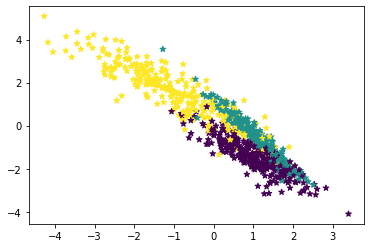

In [5]:

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [6]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [7]:


model = GaussianNB()

model.fit(X_train, y_train)

predicted = model.predict([X_test[6]])

print("Actual: ", y_test[6])
print("Predicción:", predicted[0])

Actual:  0
Predicción: 0


In [8]:
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 :", f1)

Accuracy: 0.8484848484848485
F1 : 0.8491119695890328


### Ejemplo 2

In [9]:
df = pd.read_csv('../Yandex.Disk/Z_datasets/loan_data.csv', )
df.sample(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5935,1,debt_consolidation,0.1565,279.89,10.751499,15.52,662,4110.041667,11310,63.5,2,0,0,0
1085,1,credit_card,0.0976,128.62,9.392662,9.60,707,1320.000000,3987,31.9,1,0,0,0
3307,1,home_improvement,0.1347,508.84,11.170491,18.84,682,7920.000000,34645,61.0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


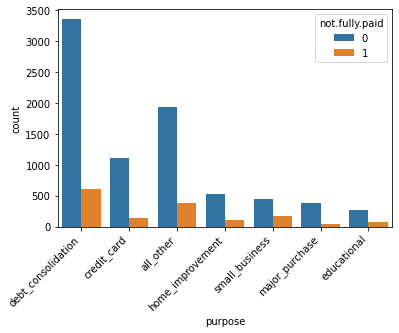

In [18]:
sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

In [12]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [19]:
X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [22]:
clf = GaussianNB()

clf.fit(X_train, y_train);

In [23]:
y_pred = clf.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 :", f1)

Accuracy: 0.8206263840556786
F1 : 0.8686606980013266


In [24]:
clf.score(X_test, y_test)

0.8206263840556786

In [25]:
confusion_matrix(y_pred, y_test)

array([[2544,  486],
       [  81,   50]])

In [26]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2625
           1       0.38      0.09      0.15       536

    accuracy                           0.82      3161
   macro avg       0.61      0.53      0.52      3161
weighted avg       0.76      0.82      0.77      3161



## Implementación

Como parte de nuestra implementación vamos a considerar que el clasificador bayesiano ingenuo se calcula a partir de

$$
P(y| x_1, x_2, \ldots, x_n) \propto P(y) \prod_i P(x_i | y)
$$

Es decir, lo que queremos encontrar es alguna característica $x_i$ que maximice a la instancia $y$. Un **supuesto** importante que haremos es que nuestros atributos se distribuyen normalmente.

### Previo

In [527]:
## imports
import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## dataset
num_filas = 100

# Genera datos aleatorios para cinco columnas discretas

data_men = {
    #'Gender': ['Male'] * 10,
    'Height (cm)': np.random.randint(165, 190, 10),
    'Waist Circumference (cm)': np.random.randint(75, 100, 10),
    'Systolic Blood Pressure (mmHg)': np.random.randint(110, 140, 10),
    'Weight (kg)': np.random.randint(60, 100, 10),
    'Age (years)': np.random.randint(20, 70, 10),
    'clasificacion': [0] *10
}

# Create a dictionary with sample data for women
data_women = {
    #'Gender': ['Female'] * 10,
    'Height (cm)': np.random.randint(150, 175, 10),  # Adjusted range for women
    'Waist Circumference (cm)': np.random.randint(60, 85, 10),  # Adjusted range for women
    'Systolic Blood Pressure (mmHg)': np.random.randint(100, 130, 10),  # Adjusted range for women
    'Weight (kg)': np.random.randint(45, 80, 10),  # Adjusted range for women
    'Age (years)': np.random.randint(20, 70, 10),
    'clasificacion': [1] *10
}

# Create DataFrames for men and women
df_men = pd.DataFrame(data_men)
df_women = pd.DataFrame(data_women)

# Concatenate the DataFrames to create the final dataset
df = pd.concat([df_men, df_women], ignore_index=True)

df

,Height (cm),Waist Circumference (cm),Systolic Blood Pressure (mmHg),Weight (kg),Age (years),clasificacion
0,189,86,128,69,25,0
1,175,88,137,93,43,0
2,167,94,131,91,20,0
3,179,77,111,89,20,0
4,167,80,113,67,47,0
5,183,90,130,95,46,0
6,174,90,111,69,58,0
7,177,96,129,61,66,0
8,171,90,131,72,22,0
9,180,99,125,81,52,0


In [533]:
columnas = list(df.columns)
atribs, clasif = columnas[:-1], columnas[-1]
col_clasif = df[clasif]
valores = col_clasif.drop_duplicates().values
#datos = pd.get_dummies(df[atribs])           # un dataframe con dummies

print(atribs), print(clasif)
datos

['Height (cm)', 'Waist Circumference (cm)', 'Systolic Blood Pressure (mmHg)', 'Weight (kg)', 'Age (years)']
clasificacion


,Height (cm),Waist Circumference (cm),Systolic Blood Pressure (mmHg),Weight (kg),Age (years)
0,166,75,116,81,36
1,170,89,135,94,44
2,166,98,135,80,65
3,181,76,127,66,35
4,166,92,118,70,54
5,181,99,114,85,35
6,167,82,123,90,29
7,179,84,137,69,42
8,187,93,113,94,50
9,176,93,133,71,21


In [532]:
# cómo obtener las filas con 1 
# de la matriz de datos
mask = col_clasif==1  # filas con 1
datos[mask]

,Height (cm),Waist Circumference (cm),Systolic Blood Pressure (mmHg),Weight (kg),Age (years)
10,153,60,106,78,23
11,174,61,113,58,35
12,158,84,108,54,65
13,170,61,119,74,25
14,163,63,123,62,53
15,155,69,115,61,62
16,169,77,114,67,45
17,172,76,122,77,28
18,168,62,115,70,30
19,169,84,110,70,47


In [377]:
# cómo obtener el dataframe en numpy
datos[mask].to_numpy();

In [540]:
# los valores de clasificacion
col_clasif.drop_duplicates().values

array([0, 1])

### Descriptor de datos

Como queremos determinar las distribuciones para cada clase vamos a crear un diccionario que nos de una entrada por separado para cada clase y sus integrantes.

In [542]:
def datos_por_clase(X, col, y):
    clases = {}
    for val in y:
        #print(f"Clase {val}")
        filas_clase = col==val
        clases[val] = X[filas_clase].to_numpy()
    return clases

clases = datos_por_clase(datos, col_clasif, valores)
clases[valores[0]], clases[valores[1]]

(array([[166,  75, 116,  81,  36],
        [170,  89, 135,  94,  44],
        [166,  98, 135,  80,  65],
        [181,  76, 127,  66,  35],
        [166,  92, 118,  70,  54],
        [181,  99, 114,  85,  35],
        [167,  82, 123,  90,  29],
        [179,  84, 137,  69,  42],
        [187,  93, 113,  94,  50],
        [176,  93, 133,  71,  21]]),
 array([[153,  60, 106,  78,  23],
        [174,  61, 113,  58,  35],
        [158,  84, 108,  54,  65],
        [170,  61, 119,  74,  25],
        [163,  63, 123,  62,  53],
        [155,  69, 115,  61,  62],
        [169,  77, 114,  67,  45],
        [172,  76, 122,  77,  28],
        [168,  62, 115,  70,  30],
        [169,  84, 110,  70,  47]]))

In [425]:
#clases

Como asumimos que siguen una distribución normal, lo que debemos hacer ahora es determinar media y std para cada clase



In [543]:
def describe(clases, valores):
    descrip_d = {}
    for val in valores:
        datos_clase = clases[val]
        # asumiendo normalidad en los datos podemos describirlos
        # con media y std
        descrip = np.array([[np.mean(c), np.std(c)] for c in zip(*datos_clase)])
        descrip_d[val] = descrip
    # vamos a regresar cada fila asociada a su clase
    return descrip_d

descriptores = describe(clases=clases, valores=valores)
descriptores

{0: array([[173.9       ,   7.43572458],
        [ 88.1       ,   8.08022277],
        [125.1       ,   9.00499861],
        [ 80.        ,  10.07968253],
        [ 41.1       ,  12.15277746]]),
 1: array([[165.1       ,   7.02068373],
        [ 69.7       ,   9.23092628],
        [114.5       ,   5.35256948],
        [ 67.1       ,   7.73886297],
        [ 41.3       ,  14.55369369]])}

Vamos a visualizar se distribuyen estas clases 

### Prob. a priori

Vamos a describir la probabilidad a prior de nuestros datos, esto es:

$$
P(X==y_i) ; i \in \{0,1\}
$$

Es decir, con qué probabilidad ocurre cada una de nuestras clases. 

In [384]:
def prior(clases_d, columna_y):
    """
    Determina la probabilidad a priori de nuestros datos
    
    :param clases_d dict: diccionario con los descriptores de las clases 
    :param columna_y series: columna con los datos de la clasificación
    :return dict:
    """
    prior_d = {}
    N = len(columna_y)
    for k, v in clases_d.items():
        prior_d[k] = len(columna_y[columna_y==k])/N
    return prior_d

apriori = prior(clases, col_clasif)
apriori

{0: 0.5, 1: 0.5}

Es decir, la clase 0 la observamos el 61% de las veces mientras que la 1 el 39% restante.

### Verosimilitud

También la van a encontrar como _likelihood_ y esencialmente es

$$
\prod P(x_i | y)
$$

```python
   
    def datos_por_clase(X, col, y):
        regresa datos de las clases en y en un diccionario
        
    def describe(clase, valores):
        describe prob y std de cada clase
        
    def prior(clases_d, columna_y):
        prob a priori de datos
    
    def likelihood(descriptores, instancia, etiqs)
    
    ## Variables
    valores        # array con valores
    clases_d       # dict
    descriptiores  # dict
    apriori        # dict
```


In [584]:
def likelihood(descrip_d, instancia, valores):
    like_d = {}     # regresaremos todo en un dict
                    # {0: 00022, 1:0000}
    
    for k in valores:  # revisamos cada una de las diferentes valores de clasificacion
        
        descripcion = descrip_d[k]    # la estimacion puntual mu y std de cada col
        # Vamos a leer nuestro vector de 5 entradas
        # para la instancia j-esima
        # y usando norm().pdf(instancia)
        for j, descr in enumerate(descripcion):
            if k in like_d:
                like_d[k] *= like_d.get(k, norm(descr[0], descr[1]).pdf(instancia[j]))
            else:
                like_d[k]  = like_d.get(k, norm(descr[0], descr[1]).pdf(instancia[j]))
    return like_d

In [575]:
likelihood(descriptores, datos.values[10], valores)

{0: 1.6779659381239804e-48, 1: 5.653735558052493e-31}

### Prediccion


In [587]:
def prediccion(datos, col_clasif, valores, instancia):
    """
    Prediccion de Bayes Ingenuo
    Probailidad a posteriori MAP
    
    nos quedamos con aquella probabilidad mayor entre las clases
    """
    c_d = datos_por_clase(datos, col_clasif.values, valores)
    d_d = describe(c_d, col_clasif.values)
    p_d = prior(c_d, col_clasif.values)
    v_d = likelihood(d_d, instancia, valores)
    print(v_d)
    prediccion = {k: p_d[k] * v_d[k] for k in p_d}
    print(prediccion)
    return max(p_d.keys(), key=lambda k: prediccion[k])

prediccion(datos, col_clasif, valores, datos.values[19])

{0: 1.4609298144214388e-22, 1: 1.000846114040645e-21}
{0: 7.304649072107194e-23, 1: 5.004230570203225e-22}


1